In [22]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Change below apogee id to create correct name

In [23]:
APOGEE_ID = '2M19344461+4514189'

In [24]:
t,phobs,magobs = np.loadtxt('fit.r.out.3',usecols=[0,3,1],unpack=True)
phobs = (phobs+0.25) % 1 - 0.25
fluobs = 10**(-0.4*magobs)
iobs = np.argsort(phobs);phobs = phobs[iobs];fluobs = fluobs[iobs];

In [25]:
x1,y1 = np.loadtxt('mod.r.out.3',usecols=[0,1],unpack=True)
x1 = (x1+0.25) % 1 - 0.25
y1 = 10**(-0.4*y1)
i = np.argsort(x1);x1 = x1[i];y1 = y1[i]
i = ()

In [26]:
xresid,yresid = np.loadtxt('fit.r.out.3',usecols=[3,5],unpack=True)
xresid = (xresid+0.25) % 1 - 0.25
iresid = np.argsort(xresid);xresid = xresid[iresid];yresid = yresid[iresid]
i = ()

<IPython.core.display.Javascript object>


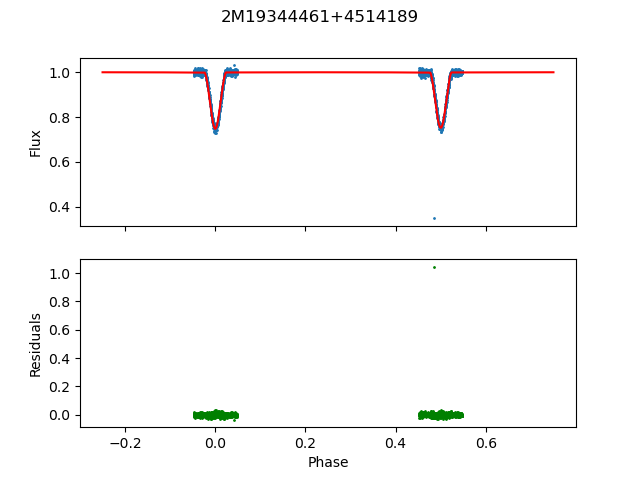

In [27]:
fig1, axs = plt.subplots(2,sharex=True)
fig1.suptitle(APOGEE_ID)
axs[0].plot(x1,y1,c='r')
axs[0].scatter(phobs,fluobs,s=1)
axs[1].set_xlabel('Phase');axs[0].set_ylabel('Flux')
axs[1].scatter(xresid,yresid,s=1,c='g')
axs[1].set_ylabel('Residuals')
fig1.savefig(APOGEE_ID+'r.png');

## Eclipse Selecting

In [8]:
secph = 0.5 #Value of Phsae of secondary eclipse (around line 90 ish) of par.out.3
primeclcon1 = -0.024 #Contact point 1 of primary eclipse in phase units
primeclcon4 = 0.024  #Contact point 4 of primary eclipse in phase units
sececlcon1 = 0.476   #Contact point 1 of secondary eclipse
sececlcon4 = 0.524   #Contact point 4 of secondaty eclipse

In [9]:
primecllen = primeclcon4 - primeclcon1
phtol1 = primecllen
sececllen = sececlcon4-sececlcon1
phtol2 = sececllen

In [10]:
I_prim = abs(phobs)<phtol1
I_sec = abs(phobs-secph)<phtol2
I = I_prim|I_sec

<IPython.core.display.Javascript object>


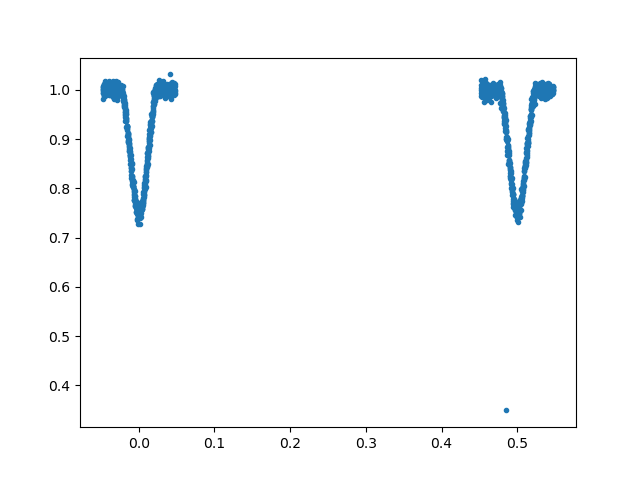

In [11]:
fig2, ax = plt.subplots(1)
ax.plot(phobs[I],fluobs[I],'.');

In [12]:
tph = t[iobs]
ttrue = tph[I]
magph = magobs[iobs]
magtrue = magph[I]
phobs = phobs[I]

In [13]:
if len(ttrue)>2500:
    print('Random Selection of 2500 datapoints from dataset of ',len(ttrue))
    i = np.arange(len(ttrue))
    j = np.random.choice(i,2500)
    ttrue = ttrue[j]
    magtrue = magtrue[j]
    phobs = phobs[j]

# RMS is the RMS of LC at the bottom of the par.out.3

In [14]:
rms = 27.0406837969
rms = rms/1000
l = len(ttrue)
e = np.empty(l)
for i in range(l):
    e[i]=rms

In [15]:
i = np.argsort(ttrue);ttrue=ttrue[i];magtrue=magtrue[i]

In [16]:
np.savetxt(APOGEE_ID+".ecl.lc",np.array([ttrue,magtrue,e]).T,fmt='%.6f')